In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [87]:
seed = 1
k = 10
np.random.seed(seed)
random_gen = np.random.RandomState(seed)

[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391  -0.24937038]]


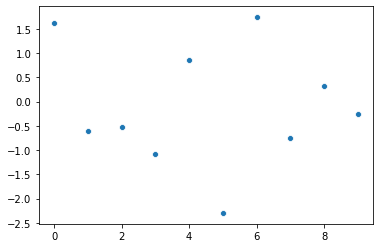

In [3]:
action_values = random_gen.normal(0,1,size=(1,k))
sns.scatterplot(x=[i for i in range(k)],y=action_values.ravel())
print(action_values)

In [93]:
def get_reward(b,stationary):
    global action_values
    if(not stationary):
        action_values+=random_gen.normal(0,0.01,(1,k))
    reward = random_gen.normal(action_values[0,b],1)
    return(reward)

In [5]:
def fn(a):
    return(np.asarray(a).mean(axis=0))

In [6]:
def reset(incremental=False):
    global action_values
    action_values = random_gen.normal(0,1,size=(1,k))
    if(incremental):
        action_values = np.zeros((1,k))

In [38]:
def run_bandit(steps,epsilon,K=10,alpha=None,initial=0,stationary=True,ucb_c=None):
    global k
    k=K
    estimates = np.ones((1,k))*initial
    num_selections = np.zeros((1,k))
    history = []
    optimal_choice = []
    for n in range(1,steps+1):
        chance = np.random.uniform()
        if(chance<=1-epsilon):
            move = np.random.choice(np.where(estimates[0,:] == estimates[0,:].max())[0])
            if(ucb_c is not None):
                move = (estimates+np.array([ucb_c*math.sqrt(np.log(n)/num_selections[0,i]) if num_selections[0,i]>0 else np.inf for i in range(k)])).argmax()
        else:
            move = int(np.random.uniform()*k)
        reward = get_reward(move,stationary)
        history.append(reward)
        optimal_choice.append(move==np.argmax(action_values[0,:]))
        num_selections[0,move]+=1
        if(alpha is not None):
            estimates[0,move]=estimates[0,move]+alpha*(reward-estimates[0,move])
        else:
            estimates[0,move]=estimates[0,move]+(1/num_selections[0,move])*(reward-estimates[0,move])
    return(history,optimal_choice,estimates)
    

## Exercise 2.5: difficulties that sample-average methods have for nonstationary problems

In [8]:
steps = 10000
iters = 500
average_rewards =[]
average_optimal_choices = []
# testbed = np.copy(action_values)

for i in range(iters):
    reset(incremental=True)
    rewards,optimal_choice,estimates = run_bandit(steps,0.1,stationary=False)
    average_rewards.append(rewards)
    average_optimal_choices.append(optimal_choice)


l11 = average_rewards
l12 = average_optimal_choices


In [9]:
steps = 10000
iters = 500
average_rewards =[]
average_optimal_choices = []
reset(incremental=True)
# testbed = np.copy(action_values)
for i in range(iters):
    reset(incremental=True)
    rewards,optimal_choice,estimates = run_bandit(steps,0.1,alpha=0.1,stationary=False)
    average_rewards.append(rewards)
    average_optimal_choices.append(optimal_choice)

l21 = average_rewards
l22 = average_optimal_choices


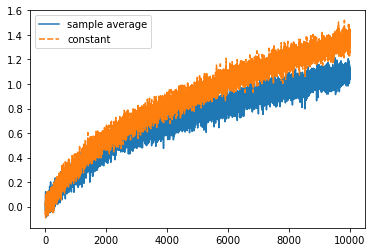

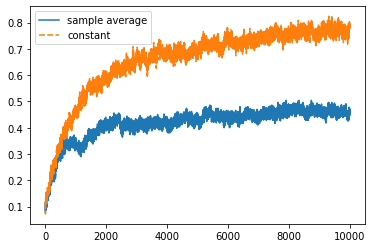

In [10]:
import pandas as pd
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df1 = pd.DataFrame(list(zip(fn(l11),fn(l21))),columns=['sample average','constant'])
sns.lineplot(data=df1)
plt.show()
df1 = pd.DataFrame(list(zip(fn(l12),fn(l22))),columns=['sample average','constant'])
sns.lineplot(data=df1)
plt.show()
# plt.savefig()

## Q2. Fig 2.3 for stationary and non stationary

In [88]:
optimistic_greedy=[]
realistic_epsilon = []
testbed = np.copy(action_values)
reset()
for i in range(1000):
    _,l1,_=run_bandit(1000,0,alpha=0.1,initial=5,stationary=True)
#     action_values = np.copy(testbed)
#     _,l2,_=run_bandit(1000,0,alpha=0.1,K=3,initial=5,stationary=True)

    _,l2,_=run_bandit(1000,0.1,alpha=0.1,stationary=True)
    optimistic_greedy.append(l1)
    realistic_epsilon.append(l2)
#     action_values = np.copy(testbed)

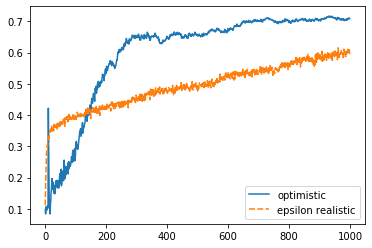

In [89]:
# fig=plt.figure(figsize=(26, 16), dpi= 80, facecolor='w', edgecolor='k')
# df = pd.DataFrame(list(zip(fn(optimistic_greedy))),columns=['Optimistic, greedy'])

df = pd.DataFrame(list(zip(fn(optimistic_greedy),fn(realistic_epsilon))),columns=['optimistic','epsilon realistic'])
# plt.xticks([i for i in range(0,1000,10)])
sns.lineplot(data=df)

In [96]:
reset()
optimistic_greedy=[]
realistic_epsilon = []
# testbed = np.copy(action_values)
# reset()
for i in range(1000):
    reset(True)
    _,l1,_=run_bandit(2000,0,alpha=0.1,initial=5,stationary=False)
    reset(True)
    _,l2,_=run_bandit(2000,0.1,alpha=0.1,stationary=False)
    optimistic_greedy.append(l1)
    realistic_epsilon.append(l2)

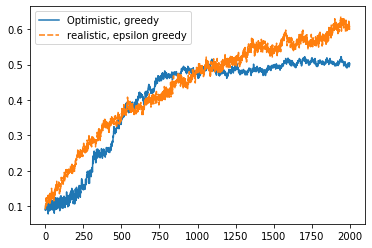

In [97]:
df = pd.DataFrame(list(zip(fn(optimistic_greedy),fn(realistic_epsilon))),columns=['Optimistic, greedy','realistic, epsilon greedy'])
sns.lineplot(data=df)

## Q4. Compare UCB to Optimistic Value and e-greedy for both Stationary & Non-Stationary case.

In [122]:
opt_r=[]
opt_a = []
real_r = []
real_a = []
ucb_r = []
ucb_a = []
reset()
testbed = np.copy(action_values)
for i in range(2000):
    r1,l1,_=run_bandit(1000,0,alpha=0.1,initial=5,stationary=True)
#     action_values = np.copy(testbed)
    opt_r.append(r1)
    opt_a.append(l1)
    r2,l2,_=run_bandit(1000,0.1,alpha=0.1,stationary=True)
    real_r.append(r2)
    real_a.append(l2)
    r3,l3,_ = run_bandit(1000,0,alpha=0.1,stationary=True,ucb_c=2)
    ucb_r.append(r3)
    ucb_a.append(l3)
#     action_values = np.copy(testbed)



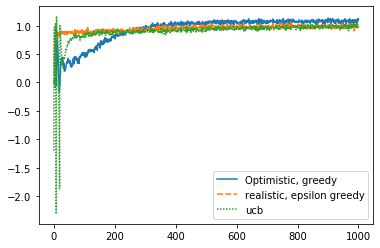

<Figure size 432x288 with 0 Axes>

In [123]:
df = pd.DataFrame(list(zip(fn(opt_r),fn(real_r),fn(ucb_r))),columns=['Optimistic, greedy','realistic, epsilon greedy','ucb'])
sns.lineplot(data=df)
plt.show()
plt.savefig("stationary_ucb_reward.png")

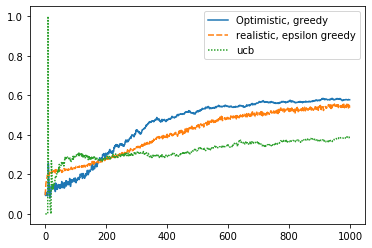

<Figure size 432x288 with 0 Axes>

In [124]:
df = pd.DataFrame(list(zip(fn(opt_a),fn(real_a),fn(ucb_a))),columns=['Optimistic, greedy','realistic, epsilon greedy','ucb'])
sns.lineplot(data=df)
plt.show()
plt.savefig("stationary_ucb_fraction.png")

In [115]:
opt_r=[]
opt_a = []
real_r = []
real_a = []
ucb_r = []
ucb_a = []
reset(True)
# testbed = np.copy(action_values)
for i in range(100):
    reset(incremental=True)
    r1,l1,_=run_bandit(4000,0,alpha=0.1,initial=5,stationary=False)
    reset(True)
    opt_r.append(r1)
    opt_a.append(l1)
    r2,l2,_=run_bandit(4000,0.1,alpha=0.1,stationary=False)
    reset(True)
    real_r.append(r2)
    real_a.append(l2)
    r3,l3,_ = run_bandit(4000,0,alpha=0.1,stationary=False,ucb_c=2)
    ucb_r.append(r3)
    ucb_a.append(l3)
    reset(True)


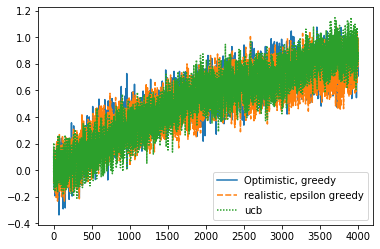

<Figure size 432x288 with 0 Axes>

In [120]:
df = pd.DataFrame(list(zip(fn(opt_r),fn(real_r),fn(ucb_r))),columns=['Optimistic, greedy','realistic, epsilon greedy','ucb'])
sns.lineplot(data=df)
plt.show()
plt.savefig("random_ucb_reward.png")

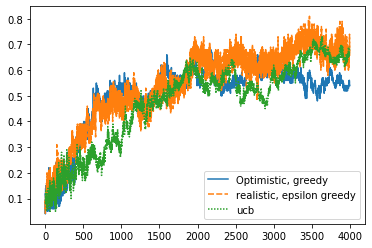

<Figure size 432x288 with 0 Axes>

In [121]:
df = pd.DataFrame(list(zip(fn(opt_a),fn(real_a),fn(ucb_a))),columns=['Optimistic, greedy','realistic, epsilon greedy','ucb'])
sns.lineplot(data=df)
plt.show()

plt.savefig("random_ucb_fraction.png")